In [8]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [9]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [10]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [11]:
for layer in resnet.layers:
    layer.trainable = False

In [14]:
folders = glob('Datasets/train/*')

In [15]:
x = Flatten()(resnet.output)

In [16]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [18]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [19]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [21]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [22]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Kunal\AppData\Local\Temp\ipykernel_1440\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 11s 6s/step - loss: 7.2318 - accuracy: 0.3438 - val_loss: 8.1357 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 12s 8s/step - loss: 5.0207 - accuracy: 0.4219 - val_loss: 3.8292 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 11s 8s/step - loss: 3.9030 - accuracy: 0.3750 - val_loss: 2.9995 - val_accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 12s 8s/step - loss: 2.0864 - accuracy: 0.5469 - val_loss: 2.5031 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 9s 8s/step - loss: 2.5878 - accuracy: 0.3906 - val_loss: 1.4285 - val_accuracy: 0.4483
Epoch 6/50
2/2 [==============================] - 13s 8s/step - loss: 1.2608 - accuracy: 0.4688 - val_loss: 2.2046 - val_accuracy: 0.3621
Epoch 7/50
2/2 [==============================] - 10s 8s/step - loss: 1.8939 - accuracy: 0.5156 - val_loss: 1.7087 - val_accuracy: 0.5345
Epoch 8/50
2/2 [===================

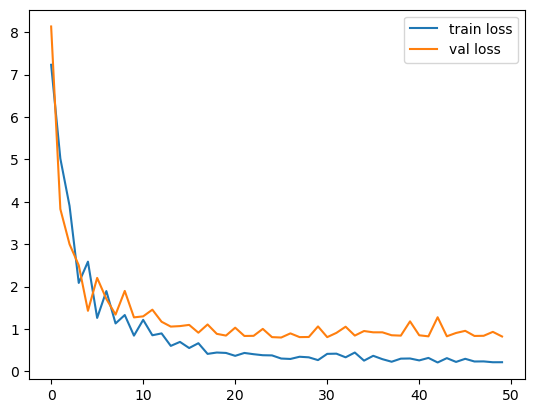

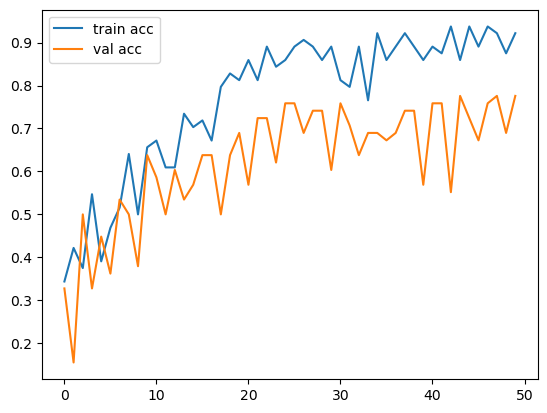

<Figure size 640x480 with 0 Axes>

In [23]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [74]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_cnn.h5')
y_pred = model.predict(test_set)
print(y_pred)
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

2/2 [==============================] - 3s 970ms/step
[[5.31293787e-02 3.85668576e-01 5.61201990e-01]
 [2.69921958e-01 7.07267404e-01 2.28106733e-02]
 [2.53689941e-03 9.94650185e-01 2.81287753e-03]
 [7.45227467e-03 9.85710442e-01 6.83736568e-03]
 [1.15875535e-01 1.65359321e-04 8.83959174e-01]
 [1.86192337e-05 1.59466674e-03 9.98386741e-01]
 [2.45729595e-01 6.09981179e-01 1.44289300e-01]
 [1.08563071e-02 9.48523998e-01 4.06196713e-02]
 [9.34900105e-01 4.87745926e-02 1.63253210e-02]
 [4.68012691e-02 7.10084319e-01 2.43114427e-01]
 [5.47683313e-02 3.64817469e-03 9.41583514e-01]
 [7.58439839e-01 2.12779865e-01 2.87803020e-02]
 [8.80142212e-01 9.77841578e-03 1.10079356e-01]
 [8.61089900e-02 8.06110919e-01 1.07780069e-01]
 [2.24422179e-02 9.52704966e-01 2.48527937e-02]
 [1.01286797e-02 9.89489853e-01 3.81436257e-04]
 [5.80773652e-02 4.26209450e-01 5.15713155e-01]
 [3.60813476e-02 8.49309623e-01 1.14609078e-01]
 [3.29748780e-01 5.23148000e-01 1.47103190e-01]
 [9.49051306e-02 9.43001173e-03 8.9

In [76]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_cnn.h5')
img=image.load_img('Datasets/Test/lamborghini/17.jpg',target_size=(224,224))
image = image.img_to_array(img)

image = image/255. 

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

model.predict(image)

result = np.argmax(model.predict(image), axis=1)

print(result)

1/1 [==============================] - 0s 80ms/step
[1]
